# Calculations related to the IGM [v1]
    These will be presented in a forthcoming paper:  Simha & Prochaska (2019)

In [1]:
#%matplotlib notebook

In [2]:
# imports
from importlib import reload
import numpy as np
import os

from pkg_resources import resource_filename

from matplotlib import pyplot as plt

from astropy import units
from astropy.table import Table
from astropy.cosmology import Planck15

from frb import igm

## Stellar mass (baryons locked up)

In [3]:
#stellar_mass_file = resource_filename('frb', 'data/IGM/stellarmass.dat')
stellar_mass_file = resource_filename('frb', os.path.join('data','IGM','stellarmass.dat'))

In [4]:
rho_mstar_tbl = Table.read(stellar_mass_file, format='ascii')

In [5]:
rho_mstar_tbl[0:5]

z,t_Gyr,rho_Mstar
float64,float64,float64
0.0,13.48,576600000.0
0.1,12.18,560400000.0
0.2,11.05,542400000.0
0.3,10.06,522900000.0
0.4,9.194,501900000.0


### Method

In [6]:
zval = np.linspace(0., 4., 100)
rho_Mstar = igm.avg_rhoMstar(zval, remnants=False)

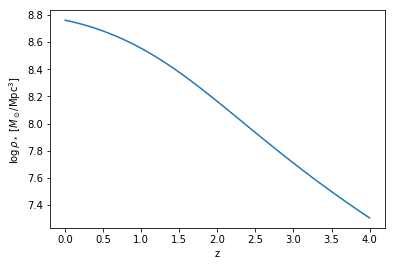

In [7]:
plt.clf()
ax = plt.gca()
ax.plot(zval, np.log10(rho_Mstar.value))
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'$\log \, \rho_* \; [M_\odot/ \rm Mpc^3]$ ')
plt.show()

### Following Fukugita 2004 (Table 1)

In [8]:
M_sphere = 0.0015
M_disk = 0.00055
M_WD = 0.00036
M_NS = 0.00005
M_BH = 0.00007
M_BD = 0.00014

In [9]:
f_remnants = (M_WD+M_NS+M_BH+M_BD) / (M_sphere+M_disk)
f_remnants

0.30243902439024395

In [10]:
rho_Mstar_full = igm.avg_rhoMstar(zval, remnants=True)

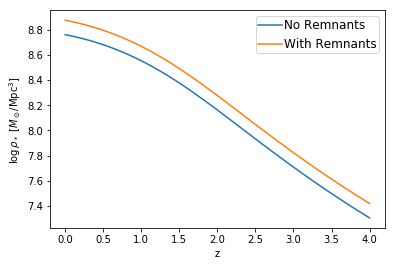

In [11]:
plt.clf()
ax = plt.gca()
ax.plot(zval, np.log10(rho_Mstar.value), label='No Remnants')
ax.plot(zval, np.log10(rho_Mstar_full.value), label='With Remnants')
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'$\log \, \rho_* \; [M_\odot/ \rm Mpc^3]$ ')
# Legend
legend = plt.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       handletextpad=0.1, fontsize='large')
plt.show()

## ISM

### $z=0$  -- Fukugita 2004

In [12]:
M_HI = 0.00062
M_H2 = 0.00016
M_ISM = M_HI + M_H2

In [13]:
M_ISM/(M_sphere+M_disk)

0.38048780487804873

### $z>0$ -- Could use DLAs and [silly] K-S relation
    For now, assume M_ISM = M* at z>1

### Do it

In [14]:
rhoISM = igm.avg_rhoISM(zval)

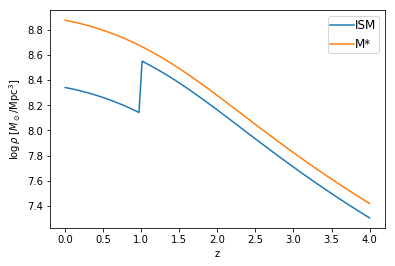

In [15]:
plt.clf()
ax = plt.gca()
ax.plot(zval, np.log10(rhoISM.value), label='ISM')
ax.plot(zval, np.log10(rho_Mstar_full.value), label='M*')
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'$\log \, \rho \; [M_\odot/ \rm Mpc^3]$ ')
# Legend
legend = plt.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       handletextpad=0.1, fontsize='large')
plt.show()

## $Y$ -- Helium
    https://arxiv.org/abs/1807.09774

In [16]:
#He_file = resource_filename('frb', 'data/IGM/qheIII.txt')
He_file = resource_filename('frb', os.path.join('data','IGM','qheIII.txt'))

In [17]:
qHeIII = Table.read(He_file, format='ascii')

In [18]:
qHeIII

z,Q_HeIII_18,Q_HeIII_18_l,Q_HeIII_18_u,Q_HeIII_21,Q_HeIII_21_l,Q_HeIII_21_u
float64,float64,float64,float64,float64,float64,float64
12.0,1e-10,1e-10,1e-10,1e-10,1e-10,1e-10
11.988,4.374927e-09,2.218632e-10,1.508848e-07,1.860788e-09,2.667322e-10,1.104288e-08
11.976,8.743113e-09,3.519406e-10,3.034705e-07,3.67851e-09,4.431452e-10,2.215664e-08
11.964,1.320629e-08,4.904414e-10,4.578895e-07,5.554472e-09,6.294819e-10,3.344437e-08
11.952,1.776445e-08,6.373657e-10,6.141419e-07,7.488672e-09,8.257424e-10,4.490605e-08
11.94,2.24176e-08,7.927134e-10,7.722276e-07,9.48111e-09,1.031927e-09,5.654171e-08
11.928,2.716575e-08,9.564846e-10,9.321466e-07,1.153179e-08,1.248034e-09,6.835133e-08
11.916,3.200887e-08,1.128679e-09,1.093899e-06,1.36407e-08,1.474066e-09,8.033491e-08
11.904,3.694699e-08,1.309297e-09,1.257485e-06,1.580786e-08,1.710021e-09,9.249246e-08


### Plot

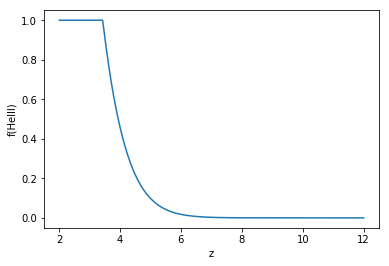

In [19]:
plt.clf()
ax=plt.gca()
ax.plot(qHeIII['z'], qHeIII['Q_HeIII_18'])
#
ax.set_xlabel('z')
ax.set_ylabel('f(HeIII)')
#
plt.show()

## DM -- Piece by piece (as coded)

### $\rho_b = \Omega_b \rho_c (1+z)^3$

### $\rho_{\rm diffuse} = \rho_b - (\rho_* + \rho_{\rm ISM})$


#### $\rho_*$ is the mass density in stars

#### $\rho_{\rm ISM}$ is the mass density in the neutral ISM

### Number densities

### $n_{\rm H} = \rho_{\rm diffuse}/(m_p \, \mu)$

#### $\mu \approx 1.3$ accounts for Helium

### $n_{\rm He} = n_{\rm H}/12$

### $n_e = n_{\rm H} [1-f_{\rm HI}] + n_{\rm He} Y$

#### $f_{\rm HI}$ is the fraction atomic Hydrogen [value betwee 0-1]

#### $Y$ gives the number of free electrons per He nucleus  [value between 0-2]

### Integrating

### $DM = \int \frac{n_e \, dr}{1+z} = \frac{c}{H_0} \int \frac{n_e \, dz}{(1+z)^2 \sqrt{(1+z)^3 \Omega_m + 
                                                                                 \Omega_\Lambda}}$

## DM -- Altogether (using the code)

In [20]:
reload(igm)
DM = igm.average_DM(1.)
DM

<Quantity 1053.08269893 pc / cm3>

### Cumulative plot

In [21]:
DM_cumul, zeval = igm.average_DM(1., cumul=True)

In [22]:
# Inoue approximation
DM_approx = 1000. * zeval * units.pc / units.cm**3

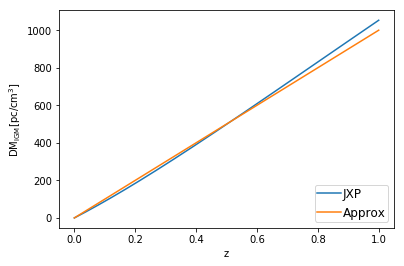

In [23]:
plt.clf()
ax = plt.gca()
ax.plot(zeval, DM_cumul, label='JXP')
ax.plot(zeval, DM_approx, label='Approx')
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'${\rm DM}_{\rm IGM} [\rm pc / cm^3]$ ')
# Legend
legend = plt.legend(loc='lower right', scatterpoints=1, borderpad=0.2,
                       handletextpad=0.1, fontsize='large')
plt.show()

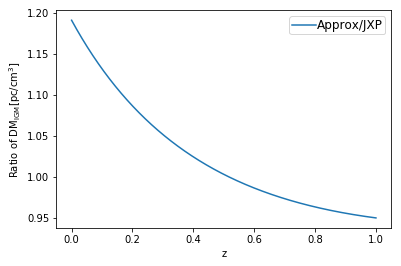

In [24]:
plt.clf()
ax = plt.gca()
ax.plot(zeval, DM_approx/DM_cumul, label='Approx/JXP')
#ax.plot(zeval, DM_approx, label='Approx')
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'Ratio of ${\rm DM}_{\rm IGM} [\rm pc / cm^3]$ ')
# Legend
legend = plt.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       handletextpad=0.1, fontsize='large')
plt.show()

In [25]:
DM_cumul[0:10]

<Quantity [0.08395647, 0.16792254, 0.25189822, 0.3358835 , 0.41987839,
           0.50388286, 0.58789694, 0.6719206 , 0.75595385, 0.83999669] pc / cm3>

In [26]:
DM_approx[0:10]

<Quantity [0.10001   , 0.20002   , 0.30003   , 0.40004   , 0.50005001,
           0.60006001, 0.70007001, 0.80008001, 0.90009001, 1.00010001] pc / cm3>

In [27]:
zeval[0]

0.00010001000100010001

----

## Development